In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

In [112]:
# Load the data and check the first few lines
dataset_path = "preprocessed_emscad_v1.csv" # use your own path

dataset = pd.read_csv(dataset_path)
dataset.head()

,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
0,Marketing Intern,"US, NY, New York",Marketing,food52 created groundbreaking award winning co...,food52 fast growing james beard award winning ...,experience content management system major plu...,NaN,0,1,0,2,4,9,Other,Marketing,0,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,90 second world cloud video production service...,organised focused vibrant awesome passion cust...,expect key responsibility communicate client 9...,get u part 90 second team gain experience work...,0,1,0,1,6,9,Marketing and Advertising,Customer Service,0,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,valor service provides workforce solution meet...,client located houston actively seeking experi...,implement pre commissioning commissioning proc...,NaN,0,1,0,2,6,9,Other,Other,0,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,passion improving quality life geography heart...,company esri environmental system research ins...,education bachelor master gi business administ...,culture anything corporate collaborative creat...,0,1,0,1,5,1,Computer Software,Sales,0,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,spotsource solution llc global human capital m...,job title itemization review manager location ...,qualification rn license state texas diploma b...,full benefit offered,0,1,1,1,5,1,Hospital & Health Care,Health Care Provider,0,0


In [113]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17534 non-null  object
 2   department           6333 non-null   object
 3   company_profile      14572 non-null  object
 4   description          17879 non-null  object
 5   requirements         15176 non-null  object
 6   benefits             10648 non-null  object
 7   telecommuting        17880 non-null  int64 
 8   has_company_logo     17880 non-null  int64 
 9   has_questions        17880 non-null  int64 
 10  employment_type      17880 non-null  int64 
 11  required_experience  17880 non-null  int64 
 12  required_education   17880 non-null  int64 
 13  industry             17880 non-null  object
 14  function             17880 non-null  object
 15  fraudulent           17880 non-null  int64 
 16  in_b

In [114]:
dataset.shape

(17880, 17)

In [115]:
dataset.isna().apply(pd.value_counts)

,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
False,17880.0,17534,6333,14572,17879,15176,10648,17880.0,17880.0,17880.0,17880.0,17880.0,17880.0,17880.0,17880.0,17880.0,17880.0
True,NaN,346,11547,3308,1,2704,7232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
#check for duplicate values
number_of_duplicaes = dataset.duplicated().sum()
print('number of duplicated rows is {}'.format(number_of_duplicaes) )

number of duplicated rows is 329


In [117]:
dataset.drop_duplicates(inplace=True)
dataset.duplicated().sum()

0

In [118]:
dataset['fraudulent'].value_counts()

0    16693
1      858
Name: fraudulent, dtype: int64

In [119]:
# the whole dataset: find out the percentgae of values missing
total_missing_percentage = dataset.isnull().sum() * 100 / len(dataset)
total_missing_percentage

title                   0.000000
location                1.942909
department             64.326819
company_profile        18.642812
description             0.005698
                         ...    
required_education      0.000000
industry                0.000000
function                0.000000
fraudulent              0.000000
in_balanced_dataset     0.000000
Length: 17, dtype: float64

In [120]:
dataset['missing location'] = dataset['location'].apply(lambda x: 1 if pd.isna(x) else 0)
dataset['missing department'] = dataset['department'].apply(lambda x: 1 if pd.isna(x) else 0)
dataset['missing company profile'] = dataset['company_profile'].apply(lambda x: 1 if pd.isna(x) else 0)
dataset['missing job description'] = dataset['description'].apply(lambda x: 1 if pd.isna(x) else 0)
dataset['missing requirements'] = dataset['requirements'].apply(lambda x: 1 if pd.isna(x) else 0)
dataset['missing benefits'] = dataset['benefits'].apply(lambda x: 1 if pd.isna(x) else 0)

<AxesSubplot:xlabel='telecommuting', ylabel='count'>

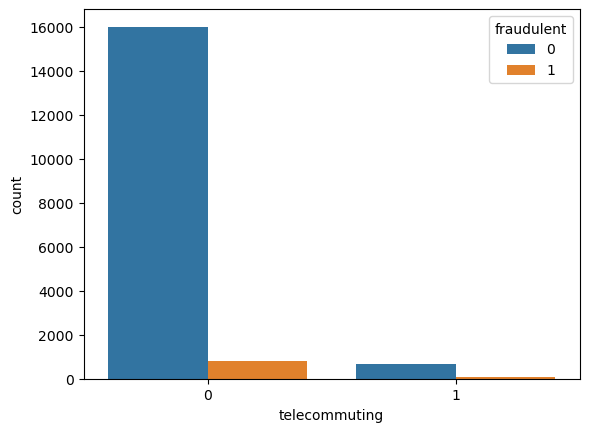

In [121]:
sns.countplot(x = 'telecommuting', hue = 'fraudulent', data = dataset)

<AxesSubplot:xlabel='has_company_logo', ylabel='count'>

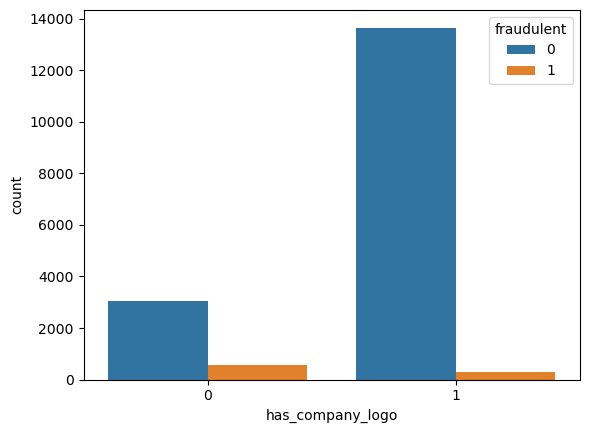

In [122]:
sns.countplot(x = 'has_company_logo', hue = 'fraudulent', data = dataset)

<AxesSubplot:xlabel='has_questions', ylabel='count'>

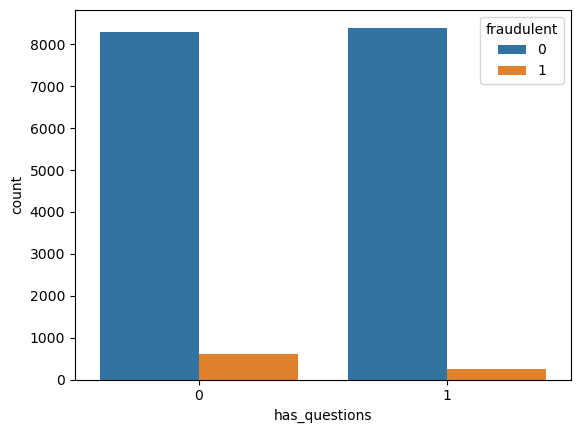

In [123]:
sns.countplot(x = 'has_questions', hue = 'fraudulent', data = dataset)

<AxesSubplot:xlabel='employment_type', ylabel='count'>

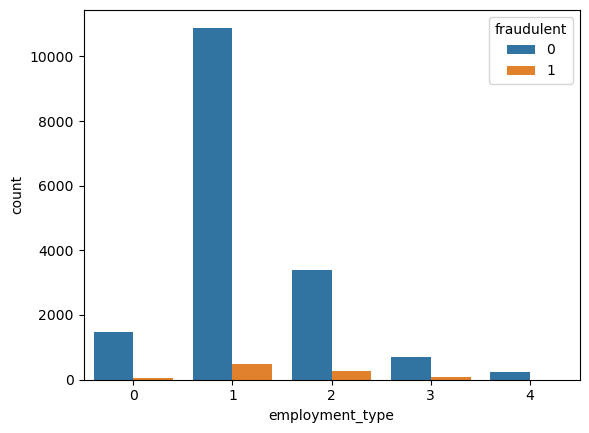

In [124]:
sns.countplot(x = 'employment_type', hue = 'fraudulent', data = dataset)

<AxesSubplot:xlabel='required_experience', ylabel='count'>

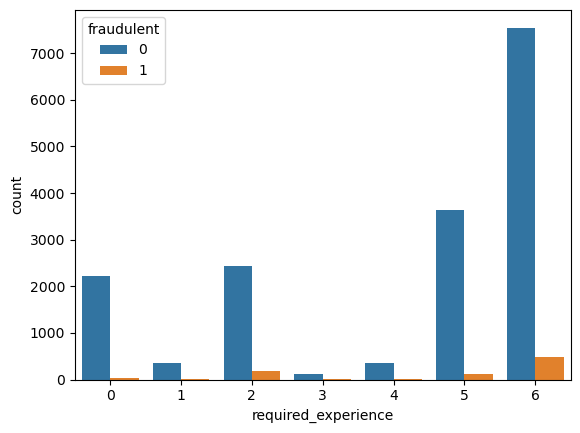

In [125]:
sns.countplot(x = 'required_experience', hue = 'fraudulent', data = dataset)

<AxesSubplot:xlabel='required_education', ylabel='count'>

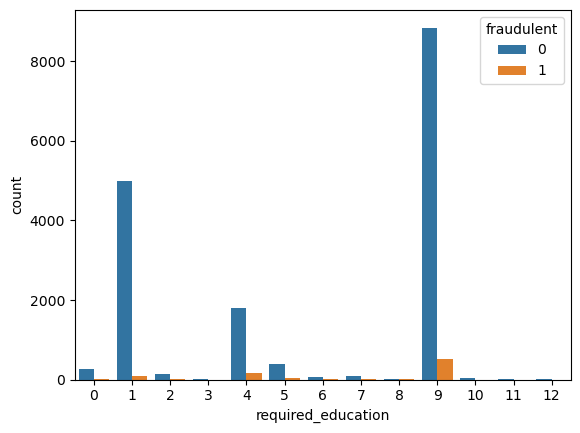

In [126]:
sns.countplot(x = 'required_education', hue = 'fraudulent', data = dataset)

<AxesSubplot:xlabel='industry', ylabel='count'>

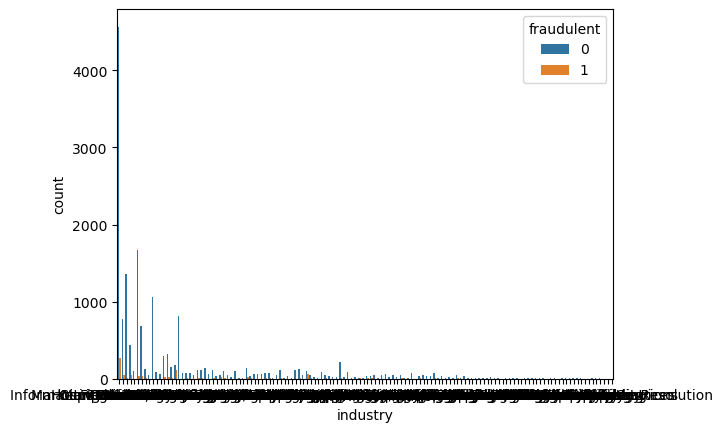

In [127]:
sns.countplot(x = 'industry', hue = 'fraudulent', data = dataset)

<AxesSubplot:xlabel='function', ylabel='count'>

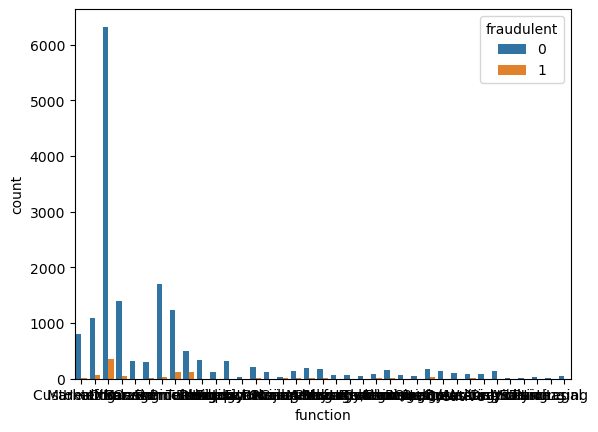

In [128]:
sns.countplot(x = 'function', hue = 'fraudulent', data = dataset)

<AxesSubplot:xlabel='in_balanced_dataset', ylabel='count'>

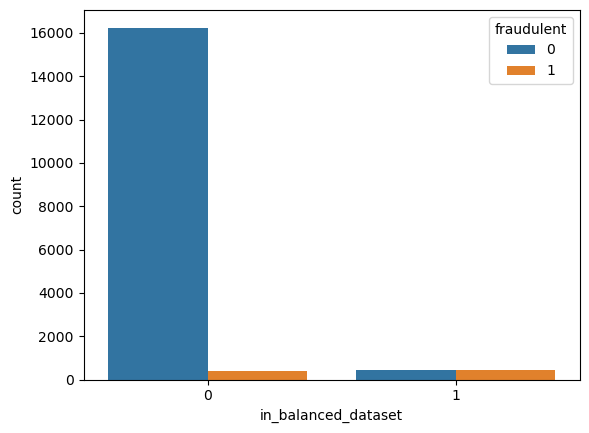

In [129]:
sns.countplot(x = 'in_balanced_dataset', hue = 'fraudulent', data = dataset)

<AxesSubplot:xlabel='missing location', ylabel='count'>

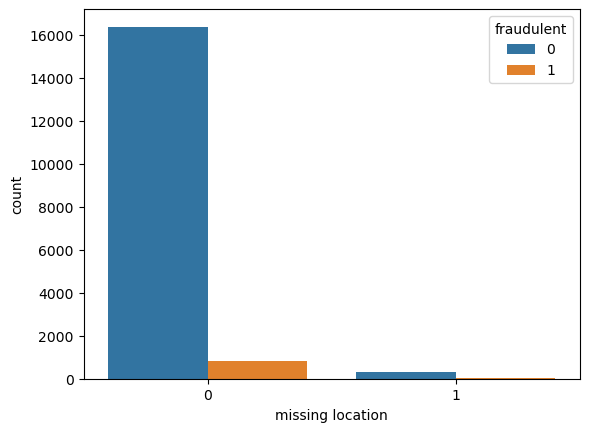

In [130]:
sns.countplot(x = 'missing location', hue = 'fraudulent', data = dataset)

<AxesSubplot:xlabel='missing department', ylabel='count'>

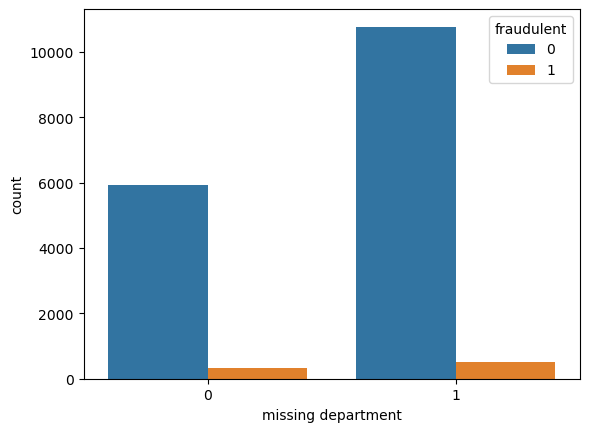

In [131]:
sns.countplot(x = 'missing department', hue = 'fraudulent', data = dataset)

<AxesSubplot:xlabel='missing company profile', ylabel='count'>

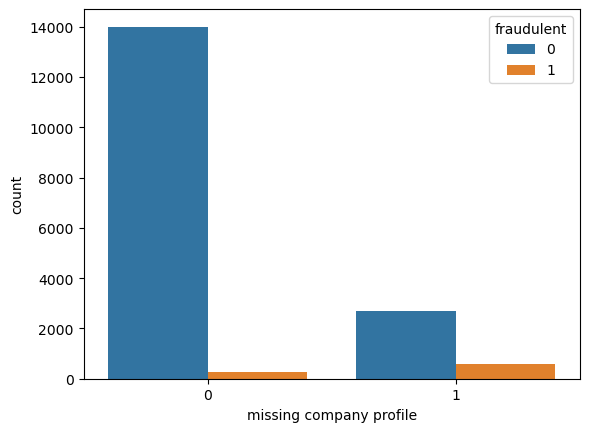

In [132]:
sns.countplot(x = 'missing company profile', hue = 'fraudulent', data = dataset)

<AxesSubplot:xlabel='missing job description', ylabel='count'>

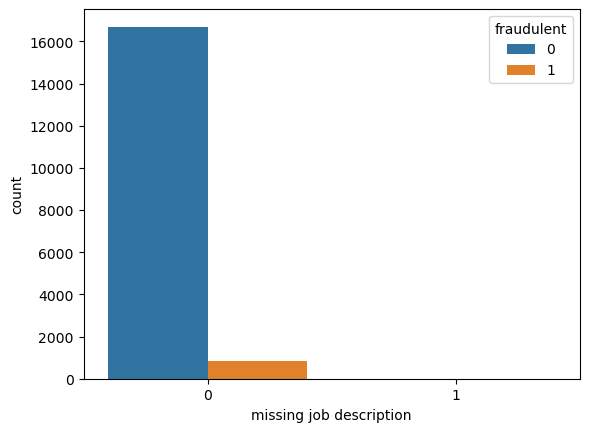

In [133]:
sns.countplot(x = 'missing job description', hue = 'fraudulent', data = dataset)

<AxesSubplot:xlabel='missing requirements', ylabel='count'>

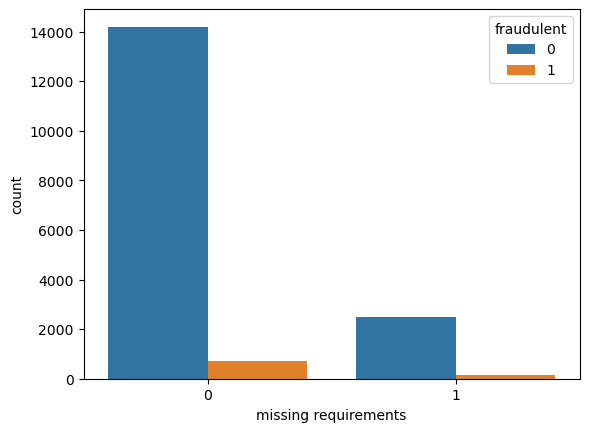

In [134]:
sns.countplot(x = 'missing requirements', hue = 'fraudulent', data = dataset)

<AxesSubplot:xlabel='missing benefits', ylabel='count'>

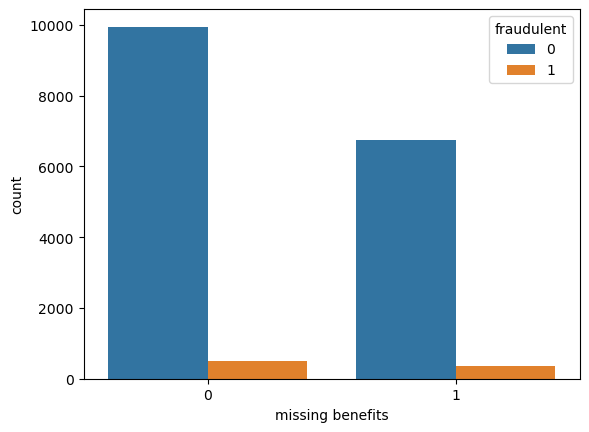

In [135]:
sns.countplot(x = 'missing benefits', hue = 'fraudulent', data = dataset)

                         telecommuting  has_company_logo  has_questions  \
telecommuting                 1.000000         -0.021800       0.019121   
has_company_logo             -0.021800          1.000000       0.234813   
has_questions                 0.019121          0.234813       1.000000   
employment_type              -0.024197         -0.032825      -0.031682   
required_experience          -0.022622         -0.146467      -0.049841   
required_education            0.017007         -0.167741      -0.111959   
fraudulent                    0.035626         -0.260881      -0.091840   
in_balanced_dataset           0.026564         -0.176768      -0.065054   
missing location              0.013072          0.016573       0.001633   
missing department           -0.021801         -0.127228      -0.138696   
missing company profile       0.067946         -0.693521      -0.154577   
missing job description      -0.001596          0.003845       0.007659   
missing requirements     

<AxesSubplot:>

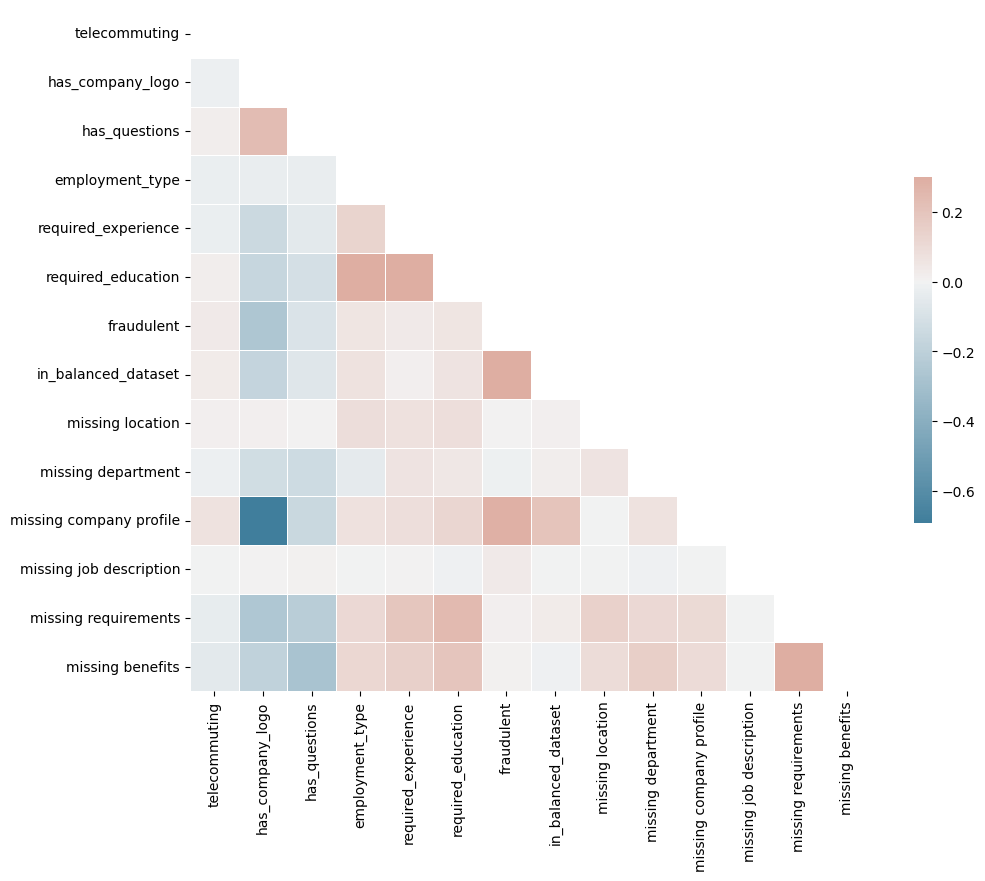

In [136]:
# method 1: correlation plot
corr = dataset.corr()
print(corr)
#Reduce to triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

doesn't seem to have any variable that has very strong correlation with the target variable.  The most correlated independent variables would be has_company_logo(0.233), missing_company_profile(0.286).

We might consider use has_company_logo and missing company profile as our model features

In [137]:
dataset.columns

Index(['title', 'location', 'department', 'company_profile', 'description',
       'requirements', 'benefits', 'telecommuting', 'has_company_logo',
       'has_questions', 'employment_type', 'required_experience',
       'required_education', 'industry', 'function', 'fraudulent',
       'in_balanced_dataset', 'missing location', 'missing department',
       'missing company profile', 'missing job description',
       'missing requirements', 'missing benefits'],
      dtype='object')

In [138]:
dataset.columns.isin(['title', 'location', 'department', 'company_profile', 'description',
       'requirements', 'benefits','industry', 'function'])

array([ True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False])

In [139]:
num_features = dataset.loc[:,~dataset.columns.isin(['title', 'location', 'department', 'company_profile', 'description',
       'requirements', 'benefits','industry', 'function', 'fraudulent', 'in_balanced_dataset'])]
target = dataset[['fraudulent']]
target

,fraudulent
0,0
1,0
2,0
3,0
4,0
...,...
17875,0
17876,0
17877,0
17878,0


(array([2.13225400e+01, 2.46032187e+02, 7.50932820e+01, 2.05545383e+01,
       2.51493513e+01, 1.21850603e+02, 3.42357150e-01, 1.38092700e+00,
       1.16526608e+03, 1.94557110e+01, 3.39469187e+00, 3.47465092e-01]), array([3.88140801e-006, 1.90320619e-055, 4.48991461e-018, 5.79562258e-006,
       5.30574971e-007, 2.48891497e-028, 5.58471780e-001, 2.39943308e-001,
       2.15795231e-255, 1.02959525e-005, 6.54065828e-002, 5.55551599e-001]))
missing location            5.584718e-01
missing benefits            5.555516e-01
missing department          2.399433e-01
missing requirements        6.540658e-02
missing job description     1.029595e-05
employment_type             5.795623e-06
telecommuting               3.881408e-06
required_experience         5.305750e-07
has_questions               4.489915e-18
required_education          2.488915e-28
has_company_logo            1.903206e-55
missing company profile    2.157952e-255
dtype: float64


<AxesSubplot:>

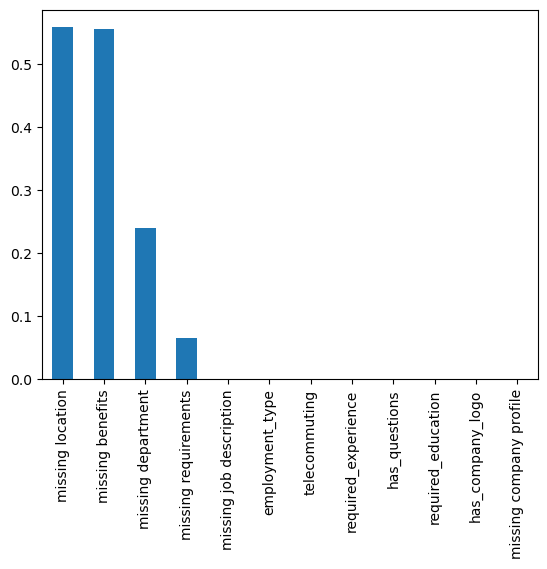

In [140]:
# 4. Feature Selections
# Method 2. Chi-square

from sklearn.feature_selection import chi2
chi_scores = chi2(np.clip(num_features,0,10000000),target) # clip is to ensure no negative values
print(chi_scores)

p_values = pd.Series(chi_scores[1],index = num_features.columns)
p_values.sort_values(ascending = False , inplace = True)

print(p_values)
p_values.plot.bar()


From the chi-square test, all p-values are less than 0.05 except missing location, missing benefits, missing departments and missing requirements, thus these few variables seem to be dependent on the target feature 

telecommuting              0.000000
has_company_logo           0.029433
has_questions              0.005356
employment_type            0.004404
required_experience        0.005353
required_education         0.008803
missing location           0.000000
missing department         0.001187
missing company profile    0.030893
missing job description    0.000000
missing requirements       0.002654
missing benefits           0.000000
dtype: float64

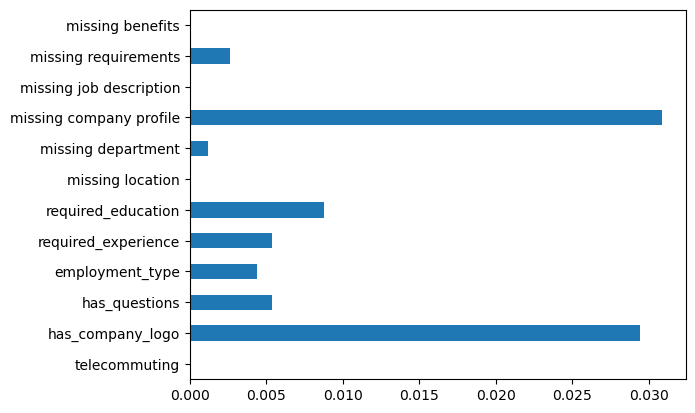

In [141]:
# 4. Feature Selections
# Method 3. Mutual Info Classifier. Estimates mutual information among the features and look at the information gain by each of the variables.
from sklearn.feature_selection import mutual_info_classif
IG = mutual_info_classif(num_features, target,random_state=42)
feature_IG = pd.Series(IG, num_features.columns)
feature_IG.plot(kind = 'barh')
feature_IG

    All have some info gain, although not a lot. Feature has_company_logo and missing company profile seems to have the highest information gain. 

In [142]:
dataset.isna().sum()

title                          0
location                     341
department                 11290
company_profile             3272
description                    1
                           ...  
missing department             0
missing company profile        0
missing job description        0
missing requirements           0
missing benefits               0
Length: 23, dtype: int64

In [143]:
dataset.loc[dataset['description'].isna()]
## only 1 entry and it is a fraudulent data

,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset,missing location,missing department,missing company profile,missing job description,missing requirements,missing benefits
937,Health & Environmental Professional,"US, CA, Bakersfield",Refined Resources,aptitude staffing solution redesigned recruiti...,NaN,responsibility duty responsibility make recomm...,please apply immediate consideration qualified...,0,1,1,1,5,1,Oil & Energy,Other,1,0,0,0,0,1,0,0


In [144]:
#Fill NaN values with blank in the dataset
dataset.fillna('  ', inplace=True)

In [145]:

#combine all text into 1 column - full_text
dataset['full_text'] = dataset['title'] + " " + dataset['location'] + " " + dataset['department']  + " " + dataset['company_profile']  + " " + dataset['description']  + " " + dataset['requirements']  + " "  + dataset['benefits'] 
dataset

,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset,missing location,missing department,missing company profile,missing job description,missing requirements,missing benefits,full_text
0,Marketing Intern,"US, NY, New York",Marketing,food52 created groundbreaking award winning co...,food52 fast growing james beard award winning ...,experience content management system major plu...,,0,1,0,2,4,9,Other,Marketing,0,0,0,0,0,0,0,1,"Marketing Intern US, NY, New York Marketing fo..."
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,90 second world cloud video production service...,organised focused vibrant awesome passion cust...,expect key responsibility communicate client 9...,get u part 90 second team gain experience work...,0,1,0,1,6,9,Marketing and Advertising,Customer Service,0,0,0,0,0,0,0,0,"Customer Service - Cloud Video Production NZ, ..."
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,valor service provides workforce solution meet...,client located houston actively seeking experi...,implement pre commissioning commissioning proc...,,0,1,0,2,6,9,Other,Other,0,0,0,1,0,0,0,1,"Commissioning Machinery Assistant (CMA) US, IA..."
3,Account Executive - Washington DC,"US, DC, Washington",Sales,passion improving quality life geography heart...,company esri environmental system research ins...,education bachelor master gi business administ...,culture anything corporate collaborative creat...,0,1,0,1,5,1,Computer Software,Sales,0,0,0,0,0,0,0,0,"Account Executive - Washington DC US, DC, Wash..."
4,Bill Review Manager,"US, FL, Fort Worth",,spotsource solution llc global human capital m...,job title itemization review manager location ...,qualification rn license state texas diploma b...,full benefit offered,0,1,1,1,5,1,Hospital & Health Care,Health Care Provider,0,0,0,1,0,0,0,0,"Bill Review Manager US, FL, Fort Worth spot..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Sales,vend looking awesome new talent come join u wo...,case first time visited website vend award win...,ace role eat comprehensive statement work brea...,expect u open culture openly share result inpu...,0,1,1,1,5,9,Computer Software,Sales,0,0,0,0,0,0,0,0,"Account Director - Distribution CA, ON, Toron..."
17876,Payroll Accountant,"US, PA, Philadelphia",Accounting,weblinc e commerce platform service provider f...,payroll accountant focus primarily payroll fun...,b b accounting desire fun love genuine passion...,health wellness medical plan prescription drug...,0,1,1,1,5,1,Internet,Accounting/Auditing,0,0,0,0,0,0,0,0,"Payroll Accountant US, PA, Philadelphia Accoun..."
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",,provide full time permanent position many medi...,experienced project cost control staff enginee...,least 12 year professional experience ability ...,,0,0,0,1,6,9,Other,Other,0,0,0,1,0,0,0,1,Project Cost Control Staff Engineer - Cost Con...
17878,Graphic Designer,"NG, LA, Lagos",,,nemsia studio looking experienced visual graph...,1 must fluent latest version corel adobe cc es...,competitive salary compensation based experien...,0,0,1,0,6,6,Graphic Design,Design,0,0,0,1,1,0,0,0,"Graphic Designer NG, LA, Lagos nemsia st..."


In [146]:


print(f"Min length of 'full text': {dataset['full_text'].map(len).min()}")
print(f"Max length of 'full text': {dataset['full_text'].map(len).max()}")

Min length of 'full text': 38
Max length of 'full text': 11727


In [147]:
def update_text(new_df): 
  new_df['full_text'] = new_df['full_text'].str.replace(pat='US', repl='USA', case=True)
  new_df['location'] = new_df['location'].str.replace(pat='US', repl='USA', case=True)
  return new_df

In [148]:
# update US with USA so it does not get mixed up with the word 'us'
dataset = update_text(dataset)

In [149]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re
from bs4 import BeautifulSoup

In [150]:
def preprocess(text):
    text = re.sub(pattern='[^a-zA-Z0-9]',repl=' ',string=text)
    text = text.lower()
    tokens = word_tokenize(text)
    stop = set(stopwords.words('english'))
    tokens = [str(word) for word in tokens if word not in stop]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    ps = PorterStemmer()
    tokens = [ps.stem(word) for word in tokens]
    sentence = ' '.join(tokens)
    return sentence

In [151]:
dataset['company_profile'] = dataset['company_profile'].apply(preprocess)
dataset['description'] = dataset['description'].apply(preprocess)
dataset['requirements'] = dataset['requirements'].apply(preprocess)
dataset['benefits'] = dataset['benefits'].apply(preprocess)

In [152]:
dataset['title'] = dataset['title'].apply(preprocess)
dataset['location'] = dataset['location'].apply(preprocess)
dataset['department'] = dataset['department'].apply(preprocess)

In [153]:
dataset['full_text'] = dataset['title'] + " " + dataset['location'] + " " + dataset['department']  + " " + dataset['company_profile']  + " " + dataset['description']  + " " + dataset['requirements']  + " "  + dataset['benefits'] 
dataset['full_text'] = dataset['full_text'].apply(preprocess)

In [154]:
dataset

,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset,missing location,missing department,missing company profile,missing job description,missing requirements,missing benefits,full_text
0,market intern,usa ny new york,market,food52 creat groundbreak award win cook site s...,food52 fast grow jame beard award win onlin fo...,experi content manag system major plu blog cou...,,0,1,0,2,4,9,Other,Marketing,0,0,0,0,0,0,0,1,market intern usa ny new york market food52 cr...
1,custom servic cloud video product,nz auckland,success,90 second world cloud video product servic 90 ...,organis focus vibrant awesom passion custom se...,expect key respons commun client 90 second tea...,get u part 90 second team gain experi work pro...,0,1,0,1,6,9,Marketing and Advertising,Customer Service,0,0,0,0,0,0,0,0,custom servic cloud video product nz auckland ...
2,commiss machineri assist cma,usa ia wever,,valor servic provid workforc solut meet need c...,client locat houston activ seek experienc comm...,implement pre commiss commiss procedur rotari ...,,0,1,0,2,6,9,Other,Other,0,0,0,1,0,0,0,1,commiss machineri assist cma usa ia wever valo...
3,account execut washington dc,usa dc washington,sale,passion improv qualiti life geographi heart ev...,compani esri environment system research insti...,educ bachelor master gi busi administr relat f...,cultur anyth corpor collabor creativ environ p...,0,1,0,1,5,1,Computer Software,Sales,0,0,0,0,0,0,0,0,account execut washington dc usa dc washington...
4,bill review manag,usa fl fort worth,,spotsourc solut llc global human capit manag c...,job titl item review manag locat fort worth tx...,qualif rn licens state texa diploma bachelor s...,full benefit offer,0,1,1,1,5,1,Hospital & Health Care,Health Care Provider,0,0,0,1,0,0,0,0,bill review manag usa fl fort worth spotsourc ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,account director distribut,ca toronto,sale,vend look awesom new talent come join u work a...,case first time visit websit vend award win we...,ace role eat comprehens statement work breakfa...,expect u open cultur openli share result input...,0,1,1,1,5,9,Computer Software,Sales,0,0,0,0,0,0,0,0,account director distribut ca toronto sale ven...
17876,payrol account,usa pa philadelphia,account,weblinc e commerc platform servic provid faste...,payrol account focu primarili payrol function ...,b b account desir fun love genuin passion acco...,health well medic plan prescript drug plan den...,0,1,1,1,5,1,Internet,Accounting/Auditing,0,0,0,0,0,0,0,0,payrol account usa pa philadelphia account web...
17877,project cost control staff engin cost control ...,usa tx houston,,provid full time perman posit mani medium larg...,experienc project cost control staff engin req...,least 12 year profession experi abil work dive...,,0,0,0,1,6,9,Other,Other,0,0,0,1,0,0,0,1,project cost control staff engin cost control ...
17878,graphic design,ng la lago,,,nemsia studio look experienc visual graphic de...,1 must fluent latest version corel adob cc esp...,competit salari compens base experi casual att...,0,0,1,0,6,6,Graphic Design,Design,0,0,0,1,1,0,0,0,graphic design ng la lago nemsia studio look e...


## next, let's test some models

In [155]:
x = dataset.drop(['fraudulent', 'title', 'location', 'department', 'company_profile', 'description', 'requirements', 'benefits', 'full_text', 'industry', 'function', 'in_balanced_dataset'] , axis = 1)
y = dataset['fraudulent']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3 , random_state = 42)


In [156]:
from sklearn.ensemble import RandomForestClassifier ,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier ,ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,recall_score,precision_score,f1_score ,classification_report, r2_score ,confusion_matrix

In [157]:
list_of_models = [LogisticRegression() , KNeighborsClassifier() , 
                  DecisionTreeClassifier() ,ExtraTreeClassifier(), RandomForestClassifier(),ExtraTreesClassifier()]
classification_report = pd.DataFrame(columns=['Accuracy','F1_score','Precision','Recall'])

for model in list_of_models :
    model = model.fit(x_train , y_train)
    for i in range(2) :
        if i == 0 :
            to_pred = x_train
            pred = y_train
            title = 'Train'
            
        else :
            to_pred = x_test
            pred = y_test
            title = 'Test'
        y_pred = model.predict(to_pred)
        acc = round(accuracy_score(pred , y_pred)*100)
        f1 = round(f1_score(pred , y_pred)*100)
        prec = round(precision_score(pred , y_pred)*100)
        recall = round(recall_score(pred , y_pred)*100)
        d = pd.DataFrame(data=np.array([acc,f1,prec,recall]).reshape(1,4) 
                     , columns=['Accuracy' , 'F1_score' , 'Precision' , 'Recall'])  
        classification_report = pd.concat([classification_report , d])
        classification_report.rename( index= { 0 :'{} _ {} Details'.format(model , title) } ,inplace=True )
pd.options.display.max_rows = 15
classification_report

,Accuracy,F1_score,Precision,Recall
LogisticRegression() _ Train Details,95,0,0,0
LogisticRegression() _ Test Details,95,0,0,0
KNeighborsClassifier() _ Train Details,94,44,41,49
KNeighborsClassifier() _ Test Details,94,42,39,47
DecisionTreeClassifier() _ Train Details,96,56,71,46
DecisionTreeClassifier() _ Test Details,95,40,52,33
ExtraTreeClassifier() _ Train Details,96,56,71,46
ExtraTreeClassifier() _ Test Details,95,41,54,33
RandomForestClassifier() _ Train Details,96,56,71,46
RandomForestClassifier() _ Test Details,95,44,57,35


## generally, high accuracy, poor recall 
however, this might appear as the best when we through in all the features when comparing to others (remove some features)
## two possible ways: do text NLP alone or text embedding and incorporate into the model

In [158]:
x = dataset.loc[:, dataset.columns.isin(['has_company_logo', 'has questions','employment_type','required_experience','required_education','missing location' ,'missing benefits' ,'missing department' ,'missing company profile', 'telecommuting' ])]
y = dataset['fraudulent']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3 , random_state = 42)


In [159]:
list_of_models = [LogisticRegression() , KNeighborsClassifier() , 
                  DecisionTreeClassifier() ,ExtraTreeClassifier(), RandomForestClassifier(),ExtraTreesClassifier()]
classification_report = pd.DataFrame(columns=['Accuracy','F1_score','Precision','Recall'])

for model in list_of_models :
    model = model.fit(x_train , y_train)
    for i in range(2) :
        if i == 0 :
            to_pred = x_train
            pred = y_train
            title = 'Train'
            
        else :
            to_pred = x_test
            pred = y_test
            title = 'Test'
        y_pred = model.predict(to_pred)
        acc = round(accuracy_score(pred , y_pred)*100)
        f1 = round(f1_score(pred , y_pred)*100)
        prec = round(precision_score(pred , y_pred)*100)
        recall = round(recall_score(pred , y_pred)*100)
        d = pd.DataFrame(data=np.array([acc,f1,prec,recall]).reshape(1,4) 
                     , columns=['Accuracy' , 'F1_score' , 'Precision' , 'Recall'])  
        classification_report = pd.concat([classification_report , d])
        classification_report.rename( index= { 0 :'{} _ {} Details'.format(model , title) } ,inplace=True )
pd.options.display.max_rows = 15
classification_report

,Accuracy,F1_score,Precision,Recall
LogisticRegression() _ Train Details,95,0,0,0
LogisticRegression() _ Test Details,95,0,0,0
KNeighborsClassifier() _ Train Details,92,33,28,40
KNeighborsClassifier() _ Test Details,92,35,30,42
DecisionTreeClassifier() _ Train Details,96,31,80,19
DecisionTreeClassifier() _ Test Details,95,24,68,15
ExtraTreeClassifier() _ Train Details,96,31,80,19
ExtraTreeClassifier() _ Test Details,95,22,61,14
RandomForestClassifier() _ Train Details,96,32,77,20
RandomForestClassifier() _ Test Details,95,25,72,15


In [160]:
x = dataset.loc[:, dataset.columns.isin(['has_company_logo', 'has questions','employment_type','required_experience','required_education',  'telecommuting' ])]
y = dataset['fraudulent']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3 , random_state = 42)


In [161]:
list_of_models = [LogisticRegression() , KNeighborsClassifier() , 
                  DecisionTreeClassifier() ,ExtraTreeClassifier(), RandomForestClassifier(),ExtraTreesClassifier()]
classification_report = pd.DataFrame(columns=['Accuracy','F1_score','Precision','Recall'])

for model in list_of_models :
    model = model.fit(x_train , y_train)
    for i in range(2) :
        if i == 0 :
            to_pred = x_train
            pred = y_train
            title = 'Train'
            
        else :
            to_pred = x_test
            pred = y_test
            title = 'Test'
        y_pred = model.predict(to_pred)
        acc = round(accuracy_score(pred , y_pred)*100)
        f1 = round(f1_score(pred , y_pred)*100)
        prec = round(precision_score(pred , y_pred)*100)
        recall = round(recall_score(pred , y_pred)*100)
        d = pd.DataFrame(data=np.array([acc,f1,prec,recall]).reshape(1,4) 
                     , columns=['Accuracy' , 'F1_score' , 'Precision' , 'Recall'])  
        classification_report = pd.concat([classification_report , d])
        classification_report.rename( index= { 0 :'{} _ {} Details'.format(model , title) } ,inplace=True )
pd.options.display.max_rows = 15
classification_report

,Accuracy,F1_score,Precision,Recall
LogisticRegression() _ Train Details,95,0,0,0
LogisticRegression() _ Test Details,95,0,0,0
KNeighborsClassifier() _ Train Details,95,11,50,6
KNeighborsClassifier() _ Test Details,95,9,45,5
DecisionTreeClassifier() _ Train Details,96,19,76,11
DecisionTreeClassifier() _ Test Details,95,18,73,10
ExtraTreeClassifier() _ Train Details,96,19,76,11
ExtraTreeClassifier() _ Test Details,95,18,75,10
RandomForestClassifier() _ Train Details,96,19,76,11
RandomForestClassifier() _ Test Details,95,18,77,10


In [162]:
## if we do with text

In [163]:
from sklearn.pipeline import Pipeline

In [164]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.metrics import accuracy_score, recall_score, plot_confusion_matrix


In [165]:
def tokenizer(sentence):
   
    mytokens = [ word for word in sentence]

    # return preprocessed list of tokens
    return mytokens

In [166]:
bow_vector = CountVectorizer(tokenizer = tokenizer, ngram_range=(1,3))

In [169]:
X_train, X_test, y_train, y_test = train_test_split(dataset.full_text, dataset.fraudulent, test_size=0.3)

In [172]:
## logistic regression with BoW
clf = LogisticRegression()

# Create pipeline using Bag of Words
pipe = Pipeline([
                 ('vectorizer', bow_vector),
                 ('classifier', clf)])

# fitting our model.
pipe.fit(X_train,y_train)


Pipeline(steps=[('vectorizer',
                 CountVectorizer(ngram_range=(1, 3),
                                 tokenizer=<function tokenizer at 0x7fa7bdfa7e50>)),
                ('classifier', LogisticRegression())])

In [173]:
predicted = pipe.predict(X_test)

# Model Accuracy
print("Logistic Regression Accuracy:", accuracy_score(y_test, predicted))
print("Logistic Regression Recall:", recall_score(y_test, predicted))

Logistic Regression Accuracy: 0.9743638435244968
Logistic Regression Recall: 0.678714859437751


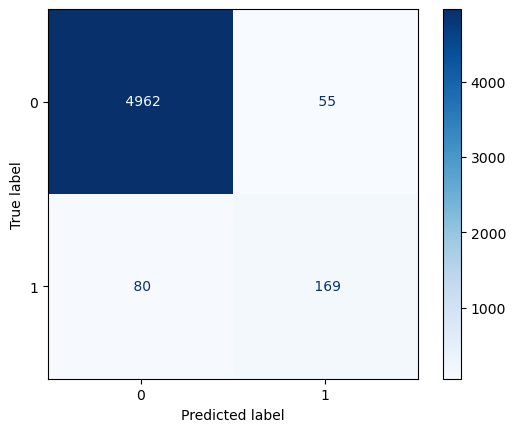

In [174]:
plot_confusion_matrix(pipe, X_test, y_test, cmap='Blues', values_format=' ')

In [175]:
clf = RandomForestClassifier()

# Create pipeline using Bag of Words
pipe = Pipeline([
                 ('vectorizer', bow_vector),
                 ('classifier', clf)])

# fitting our model.
pipe.fit(X_train,y_train)

Pipeline(steps=[('vectorizer',
                 CountVectorizer(ngram_range=(1, 3),
                                 tokenizer=<function tokenizer at 0x7fa7bdfa7e50>)),
                ('classifier', RandomForestClassifier())])

In [176]:
# Predicting with a test dataset
predicted = pipe.predict(X_test)

# Model Accuracy
print("Random Forest Accuracy:", accuracy_score(y_test, predicted))
print("Random Forest Recall:", recall_score(y_test, predicted))

Random Forest Accuracy: 0.9791112799088493
Random Forest Recall: 0.570281124497992


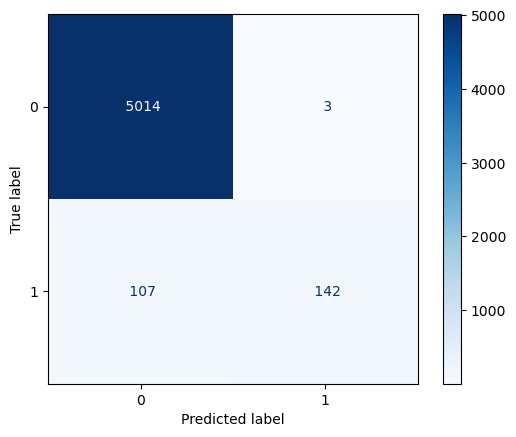

In [177]:
plot_confusion_matrix(pipe, X_test, y_test, cmap='Blues', values_format=' ')

In [178]:
from sklearn.svm import SVC
clf = SVC()

# Create pipeline using Bag of Words
pipe = Pipeline([
                 ('vectorizer', bow_vector),
                 ('classifier', clf)])

# fitting our model.
pipe.fit(X_train,y_train)

Pipeline(steps=[('vectorizer',
                 CountVectorizer(ngram_range=(1, 3),
                                 tokenizer=<function tokenizer at 0x7fa7bdfa7e50>)),
                ('classifier', SVC())])

In [180]:
# Predicting with a test dataset
predicted = pipe.predict(X_test)

# Model Accuracy
print("SVC Accuracy:", accuracy_score(y_test, predicted))
print("SVC Recall:", recall_score(y_test, predicted))

SVC Accuracy: 0.9527155336118496
SVC Recall: 0.0


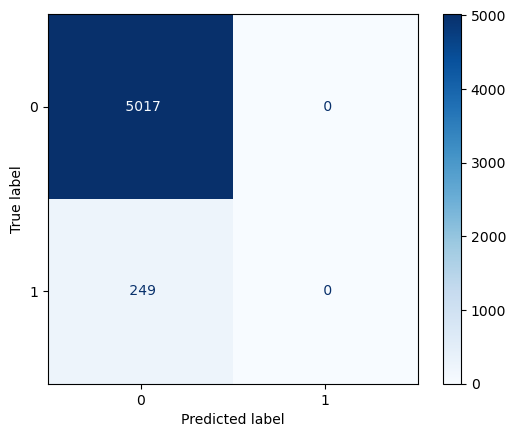

In [179]:
plot_confusion_matrix(pipe, X_test, y_test, cmap='Blues', values_format=' ')


# SVC is not very good at this task -- just simply predict everything as 0